In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X,y = iris.data, iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
                                            

In [9]:
model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [11]:
y_pred =model.predict(X_test)

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.8888888888888888

In [30]:
columns = ('MN',)  
df = pd.DataFrame(np.array(y), columns=columns)
df

,MN
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [31]:
columns = ('Feature1', 'Feature2', 'Feature3', 'Feature4')
df_X = pd.DataFrame(np.array(X), columns=columns)
df_X


,Feature1,Feature2,Feature3,Feature4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
target = list(df['MN'].unique())
feature_names = list(df_X.columns)

In [37]:
# Перетворення імен класів з числових значень в рядок
target_names = [str(t) for t in target]

In [38]:
dot_data = tree.export_graphviz(model,feature_names=feature_names,class_names=target_names)  
graph = graphviz.Source(dot_data)

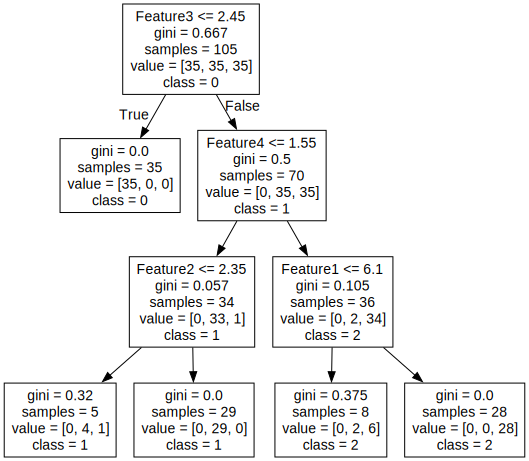

In [39]:
graph

In [40]:
importances = model.feature_importances_
importances

array([0.01189263, 0.00521677, 0.5351682 , 0.44772241])

In [43]:
sorted_importances = pd.DataFrame({'feature': columns, 'importance': importances}).sort_values('importance', ascending=False)
sorted_importances

,feature,importance
2,Feature3,0.535168
3,Feature4,0.447722
0,Feature1,0.011893
1,Feature2,0.005217
